In [1]:
#This code is modified from the source here: https://github.com/rcassani/mlp-example/blob/master/mlp_examples.ipynb
#Download the MNIST dataset here: https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

#MNIST dataset which consists of 28x28 grayscale images of 0-9 digits
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

# Useful functions
def initalize_weights_relu(size_layer, size_next_layer):
    np.random.seed(5)
    # Method presented in "Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classfication"
    # He et Al. 2015
    epsilon = np.sqrt(2.0 / (size_layer * size_next_layer) )
    # Weigts from Normal distribution mean = 0, std = epsion
    w = epsilon * (np.random.randn(size_next_layer, size_layer))
    return w.transpose()

## Parameters of MLP
* __Epochs: 400
* __Number of layers__ : 3 (input, hidden1, output)
* __Elements in layers__ : [784, 100, 10]   
* __Activation function__ : Rectified Linear function
* __Regularization parameter__ : 0
* __Bias element added in input layers__ : False

  0%|          | 0/20 [00:00<?, ?it/s]

(60000, 784) (60000,)


27.233888387680054 s
Training Accuracy: 90.0


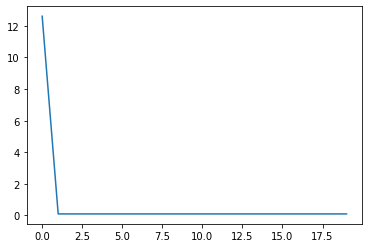

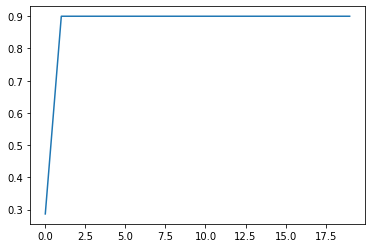

In [2]:
# Load data
#X, Y, labels, y = load_mnist()
(x_train, y_train), (x_test, y_test) = load_data('mnist.npz')

#Flatten the image to 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
print(x_train.shape, y_train.shape)

#Convert the labels to one_hot encoding
one_hot = np.zeros((len(y_train), 10), dtype=np.uint8)
one_hot[np.arange(len(y_train)), y_train] = 1
y_train = one_hot

tic = time.time()

# size_layers = [784, 100, 10]

#Network design:
"""
28x28 image flattened to 784
Dense fully connect hidden layer
   Input: 784   Output: 100
   ReLu
Dense fully connected output layer
   Input: 100   Output: 10
   ReLU 
"""

def relu(x):
    return np.maximum(x, 0)

def relu_derivative(x, w):
    z = np.dot(x,w)
    return 1 * (z > 0) 

def dense_layer(x, w):
    h = x.dot(w) #hidden layer h = Wx
    h = relu(h) #relu activation function
    return h

def mse_loss(y_hat, y):
    loss = np.square(y_hat - y).mean()
    return loss
    
# Randomly initialize weights
w1 = initalize_weights_relu(784, 100)  
w2 = initalize_weights_relu(100, 10)

epochs = 20
losses = np.zeros((epochs), dtype=np.float32)
accs = np.zeros((epochs), dtype=np.float32)

t = tqdm(range(epochs), leave=False, total=epochs)
for ix in t:   
    # Forward pass: compute y_hat    
    h1 = dense_layer(x_train, w1)
    y_hat = dense_layer(h1, w2) #Ideally, this would be softmax instead
        
    # Compute loss
    loss = mse_loss(y_hat, y_train)
    acc = np.mean(1 * (y_hat == y_train))    
    
    #Backpropagation
    grad2 = np.dot(h1.T, (y_hat - y_train) * relu_derivative(h1, w2))
    grad1 = np.dot(x_train.T, np.dot((y_hat - y_train) * relu_derivative(h1, w2), \
                                      w2.T) * relu_derivative(x_train, w1))  
    
    # Update weights
    w1 = w1 - grad1
    w2 = w2 - grad2

    #Track the loss
    losses[ix] = loss
    accs[ix] = acc
    
    if ix % 5 == 0:
        t.set_description(f"[Epoch {ix}] loss={loss:.4f}  acc={acc*100:.2f}")
    
print(str(time.time() - tic) + ' s')
    
# Ploting loss vs epochs
plt.figure()
ix = np.arange(epochs)
plt.plot(ix, losses)

# Ploting acc vs epochs
plt.figure()
ix = np.arange(epochs)
plt.plot(ix, accs)


# Training Accuracy
acc = np.mean(1 * (y_hat == y_train))
print('Training Accuracy: ' + str(acc*100))